# How to EDF file

In [3]:
# import pyedflib
# import numpy as np

# file_name = 'MendeleyEEG/Emotiv 30s EDF\S004\S004E03.edf'
# f = pyedflib.EdfReader(file_name)
# n = f.signals_in_file
# signal_labels = f.getSignalLabels()
# sigbufs = np.zeros((n, f.getNSamples()[0]))
# for i in np.arange(n):
#         sigbufs[i, :] = f.readSignal(i)
# f.close()
# sigbufs.shape

OSError: MendeleyEEG/Emotiv 30s EDF\S004\S004E03.edf: the file is not EDF(+) or BDF(+) compliant (Physical Maximum)

# Dataset

## Read files

In [94]:
from glob import glob
import os
import numpy
import datasets

data_paths = glob('MendeleyEEG/Emotiv 30s EDF/*/*')
data_paths

['MendeleyEEG/Emotiv 30s EDF\\S001\\S001E01.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S001\\S001E02.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S001\\S001E03.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S001\\S001E04.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S002\\S002E01.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S002\\S002E02.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S002\\S002E03.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S002\\S002E04.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S003\\S003E01.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S003\\S003E02.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S003\\S003E03.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S003\\S003E04.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S004\\S004E01.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S004\\S004E02.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S004\\S004E03.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S004\\S004E04.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S005\\S005E01.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S005\\S005E02.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S005\\S005E03.edf',
 'MendeleyEEG/Emotiv 30s EDF\\S005\\S005E04.edf',


In [11]:
import pyedflib
import numpy as np
import pandas as pd

df = {'id':[], 'all':[], 'first_minute':[], 'second_minute':[], 'last_minute':[]}
for path in data_paths:
        try:
                f = pyedflib.EdfReader(path)
                n = f.signals_in_file
                # signal_labels = f.getSignalLabels()
                df['id'].append(path.split('\\')[-1][:-4])
                sigbufs = np.zeros((n, f.getNSamples()[0]))
                for i in np.arange(n):
                        sigbufs[i, :] = f.readSignal(i)
                
                df['all'].append(sigbufs)
                df['first_minute'].append(sigbufs[:, :46080//3])
                df['second_minute'].append(sigbufs[:, 46080//3:2*46080//3])
                df['last_minute'].append(sigbufs[:, 2*46080//3:])
                f.close()
        except:
                print(f"Failed to read file {path}")
df = pd.DataFrame(df)
df

Failed to read file MendeleyEEG/Emotiv 30s EDF\S004\S004E03.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S005\S005E01.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S005\S005E02.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S005\S005E03.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S005\S005E04.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S006\S006E02.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S006\S006E04.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S009\S009E01.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S009\S009E02.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S009\S009E04.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S010\S010E03.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S010\S010E04.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S011\S011E02.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S011\S011E03.edf
Failed to read file MendeleyEEG/Emotiv 30s EDF\S012\S012E03.edf
Failed to read file MendeleyEEG/Emotiv 3

id                                                all  \
0   S001E01  [[-60.77776775768693, -56.74816647592909, -50....   
1   S001E02  [[5.5269504844738, 0.4138204013121297, -4.2090...   
2   S001E03  [[1.8620508659494817, 4.425911009384287, 3.913...   
3   S001E04  [[8.216019378957807, 4.6272263187609655, 0.524...   
4   S002E01  [[-49.68448674753953, -35.3249460288396, -20.9...   
..      ...                                                ...   
77  S027E02  [[18.460160982680723, 20.50515068284094, 19.99...   
78  S027E03  [[2.5143396658273325, 3.503962005035389, 3.503...   
79  S029E01  [[2.734228213931463, 1.1921756923780944, 1.709...   
80  S030E02  [[-5.405597344930202, -3.865516273746865, -8.9...   
81  S030E03  [[-1.6949228656445476, -3.693759212634706, -5....   

                                         first_minute  \
0   [[-60.77776775768693, -56.74816647592909, -50....   
1   [[5.5269504844738, 0.4138204013121297, -4.2090...   
2   [[1.8620508659494817, 4.425911009384287, 3.913...   
3   [[8.216019378957807, 4.6272263187609655, 0.524...   
4   [[-49.68448674753953, -35.3249460288396, -20.9...   
..                                                ...   
77  [[18.460160982680723, 20.50515068284094, 19.99...   
78  [[2.5143396658273325, 3.503962005035389, 3.503...   
79  [[2.734228213931463, 1.1921756923780944, 1.709...   
80  [[-5.405597344930202, -3.865516273746865, -8.9...   
81  [[-1.6949228656445476, -3.693759212634706, -5....   

                                        second_minute  \
0   [[-18.20864652475796, -16.245507438773373, -19...   
1   [[78.86184359502542, 77.88124330510401, 75.289...   
2   [[6.989771152819094, 9.041491538872348, 10.065...   
3   [[-8.705634998092625, -4.6030102693217385, -2....   
4   [[230.82119697871363, 229.29231059739067, 228....   
..                                                ...   
77  [[-77.39873121232958, -75.35374151216936, -72....   
78  [[38.860469214923235, 41.46947356374447, 40.92...   
79  [[12.992229770351697, 8.883282368200176, 8.883...   
80  [[-21.306434378576345, -29.00017271686886, -34...   
81  [[-3.259229571984671, -3.693759212634706, -1.6...   

                                          last_minute  
0   [[-39.80317647058843, -37.736714274815185, -36...  
1   [[47.622720073243165, 47.622720073243165, 45.5...  
2   [[14.681351583123512, 18.78479235523002, 22.88...  
3   [[-4.091854807354851, -3.5780231387808064, -3....  
4   [[319.5565634241245, 327.2309734950789, 343.11...  
..                                                ...  
77  [[-23.547335774777128, -25.081078049897293, -2...  
78  [[-7.291918059052502, -3.1534973678188107, -0....  
79  [[-3.42440390630963, -4.956878461890618, -4.95...  
80  [[-14.126056397344943, -11.55925461203938, -7....  
81  [[-2.216358434424589, 0.3908194094756174, 4.99...  

[82 rows x 5 columns]

In [56]:
df.to_csv('eeg_fusion_relax_concentrate_time_series.csv', index=False)

## Windowing

In [57]:
import pandas as pd
df = pd.read_csv('eeg_fusion_relax_concentrate_time_series.csv')
df

id                                       first_minute  \
0   S001E01  [[-60.77776775768693, -56.74816647592909, -50....   
1   S001E02  [[5.5269504844738, 0.4138204013121297, -4.2090...   
2   S001E03  [[1.8620508659494817, 4.425911009384287, 3.913...   
3   S001E04  [[8.216019378957807, 4.6272263187609655, 0.524...   
4   S002E01  [[-49.68448674753953, -35.3249460288396, -20.9...   
..      ...                                                ...   
77  S027E02  [[18.460160982680723, 20.50515068284094, 19.99...   
78  S027E03  [[2.5143396658273325, 3.503962005035389, 3.503...   
79  S029E01  [[2.734228213931463, 1.1921756923780944, 1.709...   
80  S030E02  [[-5.405597344930202, -3.865516273746865, -8.9...   
81  S030E03  [[-1.6949228656445476, -3.693759212634706, -5....   

                                        second_minute  \
0   [[-18.20864652475796, -16.245507438773373, -19...   
1   [[78.86184359502542, 77.88124330510401, 75.289...   
2   [[6.989771152819094, 9.041491538872348, 10.065...   
3   [[-8.705634998092625, -4.6030102693217385, -2....   
4   [[230.82119697871363, 229.29231059739067, 228....   
..                                                ...   
77  [[-77.39873121232958, -75.35374151216936, -72....   
78  [[38.860469214923235, 41.46947356374447, 40.92...   
79  [[12.992229770351697, 8.883282368200176, 8.883...   
80  [[-21.306434378576345, -29.00017271686886, -34...   
81  [[-3.259229571984671, -3.693759212634706, -1.6...   

                                          last_minute  
0   [[-39.80317647058843, -37.736714274815185, -36...  
1   [[47.622720073243165, 47.622720073243165, 45.5...  
2   [[14.681351583123512, 18.78479235523002, 22.88...  
3   [[-4.091854807354851, -3.5780231387808064, -3....  
4   [[319.5565634241245, 327.2309734950789, 343.11...  
..                                                ...  
77  [[-23.547335774777128, -25.081078049897293, -2...  
78  [[-7.291918059052502, -3.1534973678188107, -0....  
79  [[-3.42440390630963, -4.956878461890618, -4.95...  
80  [[-14.126056397344943, -11.55925461203938, -7....  
81  [[-2.216358434424589, 0.3908194094756174, 4.99...  

[82 rows x 4 columns]

In [60]:
from ast import literal_eval
import numpy as np

df['first_minute'].iloc[0]

'[[-60.77776775768693, -56.74816647592909, -50.032164339666025, -42.90286976424831, -37.736714274815185, -35.153636530098616, -33.60378988326868, -31.640650797284092, -28.540957503624217, -24.408033112077714, -21.82495536736115, -21.30833981841784, -23.374802014191086, -24.408033112077714, -22.858186465247776, -17.79535408560331, -10.046120851453619, -3.4334418249792162, -0.8503640802626525, -2.9168262760359034, -7.4630431067370555, -10.562736400396933, -7.979658655680368, -0.33374853131933974, 8.965331349660289, 16.094625925078006, 19.710934767681195, 20.74416586556782, 22.294012512397757, 24.77376714732566, 26.840229343098912, 27.356844892042222, 25.806998245212284, 22.294012512397757, 20.22755031662451, 20.74416586556782, 24.77376714732566, 30.4565381857021, 33.556231479361976, 33.03961593041866, 29.423307087815473, 25.806998245212284, 26.840229343098912, 32.52300038147535, 39.652294956893066, 44.818450446326196, 46.36829709315613, 44.30183489738288, 40.68552605477969, 36.6559247730

In [59]:
def slide_window(df, window_size, stride):
    for idx, i in enumerate(range(0, df['first_minute'].shape[0], stride)):
        df[f'first_minute{idx+1}'] = df['first_minute'][i:i+window_size]

    for idx, i in enumerate(range(0, df['second_minute'].shape[0], stride)):
        df[f'second_minute{idx+1}'] = df['second_minute'][i:i+window_size]

    for idx, i in enumerate(range(0, df['last_minute'].shape[0], stride)):
        df[f'last_minute{idx+1}'] = df['last_minute'][i:i+window_size]

    df = df.drop(['first_minute', 'second_minute', 'last_minute'])
    return df

df = df.apply(slide_window, window_size=5, stride=3, axis=1)
df

AttributeError: 'str' object has no attribute 'shape'

In [18]:
df.to_csv('eeg_fusion_relax_concentrate_window.csv', index=False)

In [3]:
import datasets

dataset = datasets.load_from_disk("C:/Users/thapa/Downloads/EEG-relaxation-concentration")
dataset

DatasetDict({
    train: Dataset({
        features: ['data', 'label'],
        num_rows: 3767
    })
    test: Dataset({
        features: ['data', 'label'],
        num_rows: 907
    })
})

In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [5]:
dataset.push_to_hub('JuniorThap/EEG-relaxation-concentration')

Uploading the dataset shards:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/JuniorThap/EEG-relaxation-concentration/commit/2fd124ffea7b0df5db394e5a0ed683191d53dae1', commit_message='Upload dataset', commit_description='', oid='2fd124ffea7b0df5db394e5a0ed683191d53dae1', pr_url=None, pr_revision=None, pr_num=None)

In [12]:
from datasets import load_dataset

dataset = load_dataset('JuniorThap/EEG-relaxation-concentration')
dataset

Generating train split:   0%|          | 0/3767 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/907 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['data', 'label'],
        num_rows: 3767
    })
    test: Dataset({
        features: ['data', 'label'],
        num_rows: 907
    })
})

In [13]:
import numpy as np

np_ds = dataset.with_format("np")

X_train = np_ds['train']['data']
X_test = np_ds['test']['data']
y_train = np_ds['train']['label']
y_test = np_ds['test']['label']

X_train.shape, y_train.shape

((3767, 14, 1250), (3767,))

In [14]:
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF42']
sfreq = 250

In [89]:
import mne

train_shape = X_train.shape
test_shape = X_test.shape
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw_train = mne.io.RawArray(X_train.reshape(train_shape[1], train_shape[0] * train_shape[2]), info = info)
raw_test = mne.io.RawArray(X_test.reshape(test_shape[1], test_shape[0] * test_shape[2]), info = info)
raw_train

Creating RawArray with float64 data, n_channels=14, n_times=4708750
    Range : 0 ... 4708749 =      0.000 ... 18834.996 secs
Ready.
Creating RawArray with float64 data, n_channels=14, n_times=1133750
    Range : 0 ... 1133749 =      0.000 ...  4534.996 secs
Ready.


<RawArray | 14 x 4708750 (18835.0 s), ~503.0 MB, data loaded>

In [93]:
raw_train.get_data().shape

(14, 4708750)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



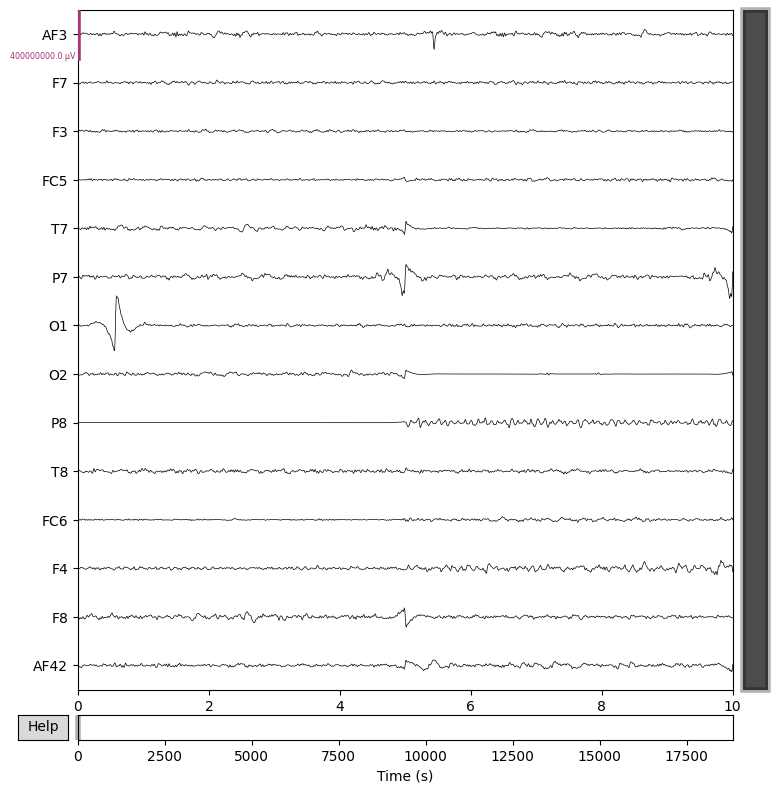

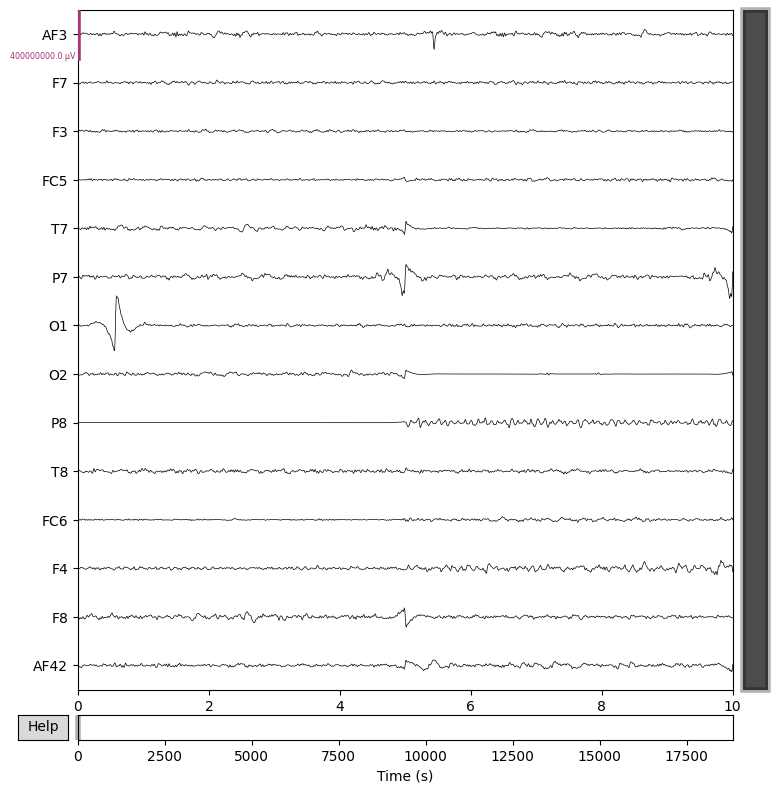

In [105]:
raw_train.filter(3, 30).plot(scalings=200, bad_color='r')

In [55]:
import mne

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
epochs_train = mne.EpochsArray(X_train, info = info)
epochs_test = mne.EpochsArray(X_test, info = info)
epochs_train

Not setting metadata
3767 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
907 matching events found
No baseline correction applied
0 projection items activated


<EpochsArray |  3767 events (all good), 0 – 4.996 s, baseline off, ~503.0 MB, data loaded,
 '1': 3767>

In [56]:
epochs_train = epochs_train.filter(3, 30)
epochs_test = epochs_test.filter(3, 30)

Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    0.9s
[Parallel(n_job

Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.1s
[Parallel(n_job

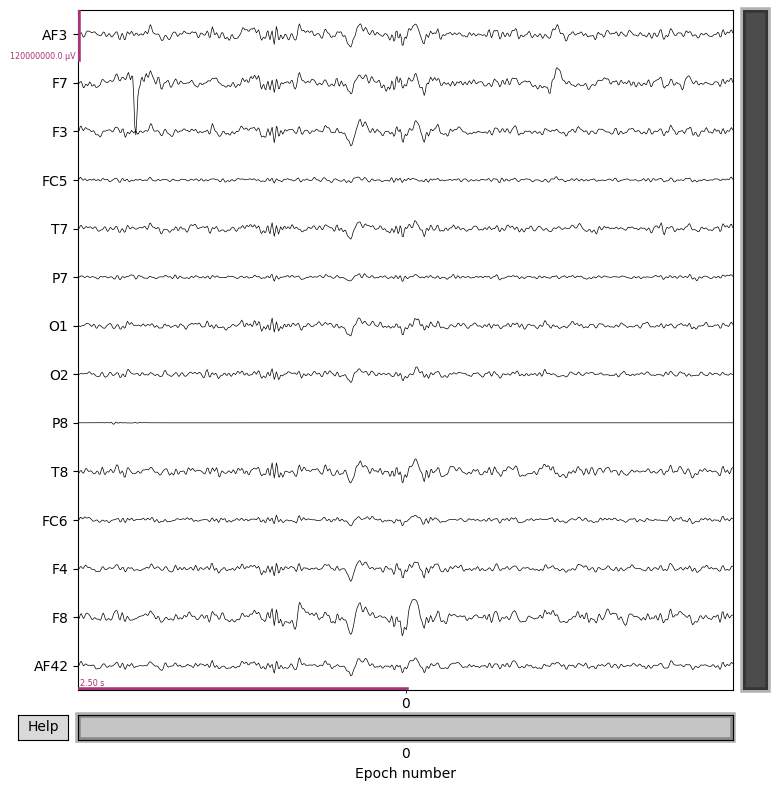

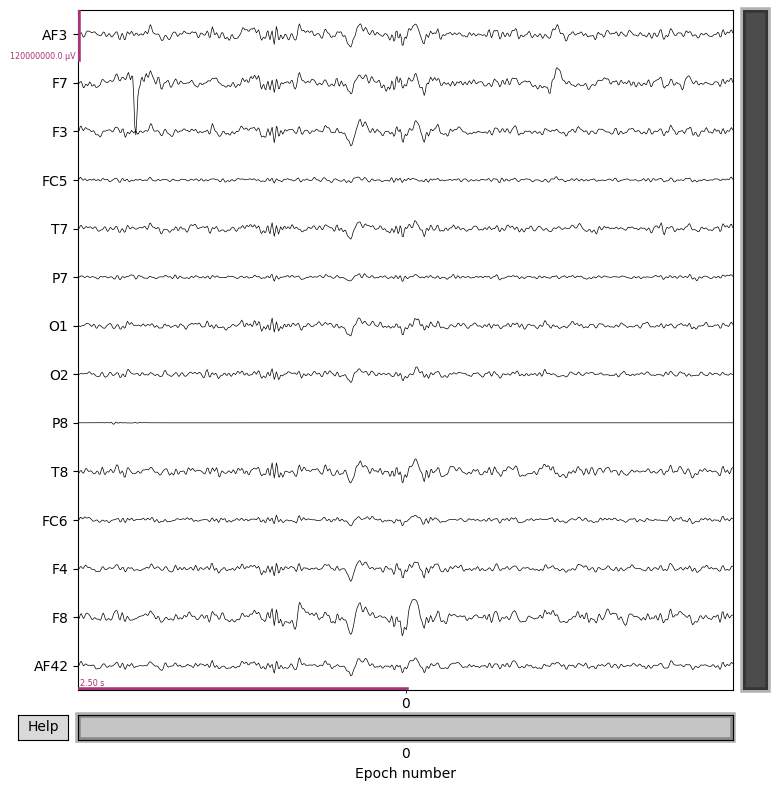

In [57]:
epochs_train[0].plot(scalings=60, n_epochs=1)

In [106]:
from mne.preprocessing import ICA

_ica = ICA(14)
_ica

<ICA | no decomposition, method: fastica>

In [108]:
_ica = _ica.fit(raw_train)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 98.4s.


In [109]:
raw_train = _ica.apply(raw_train)

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 413 samples (1.652 s)



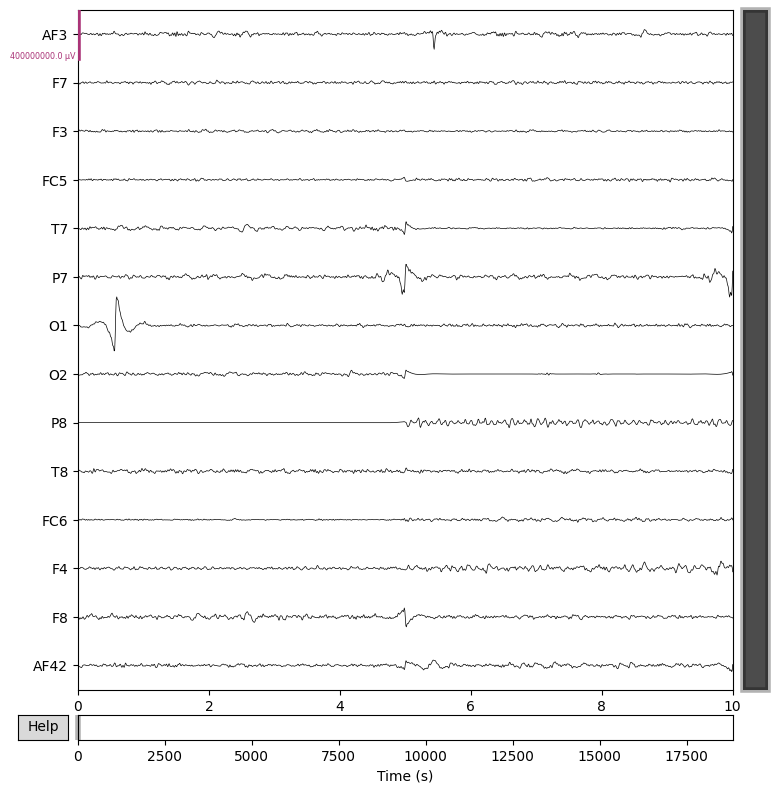

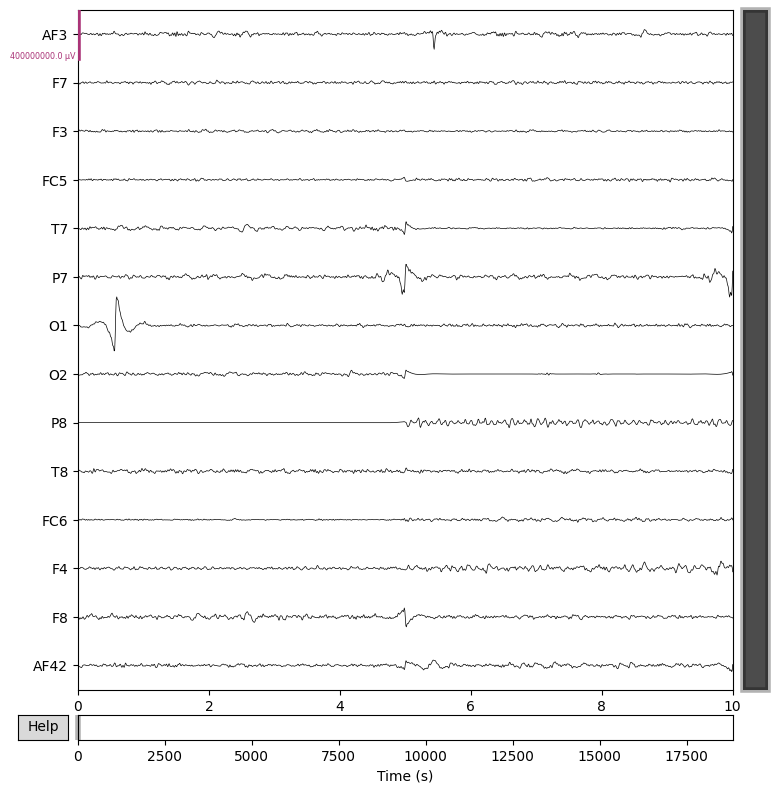

In [110]:
raw_train.filter(3, 30).plot(scalings=200, bad_color='r')

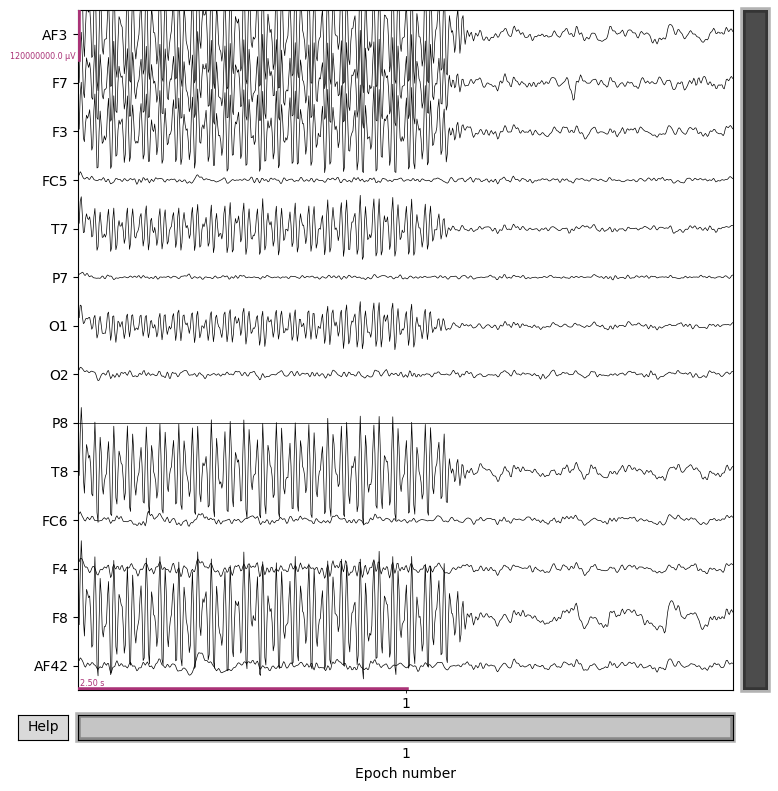

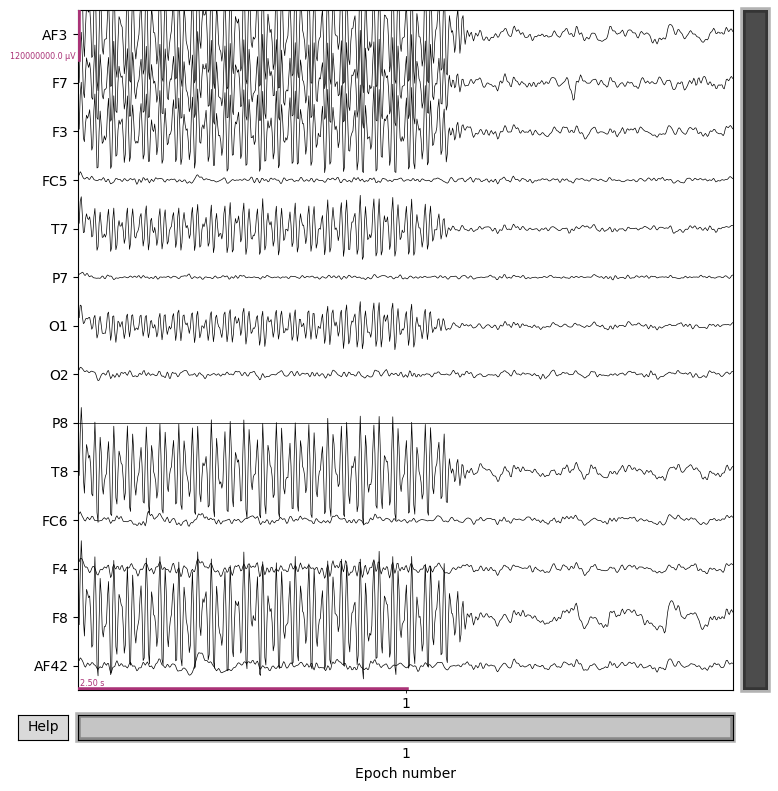

In [68]:
epochs_train[1].plot(scalings=60, n_epochs=1)

In [112]:
average_train = epochs_train.average()
average_train

<Evoked | '1' (average, N=3767), 0 – 4.996 s, baseline off, 14 ch, ~152 kB>

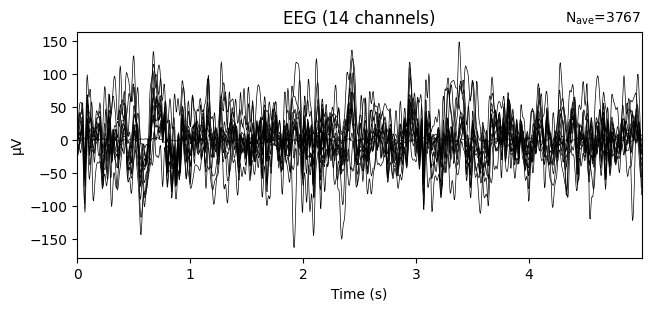

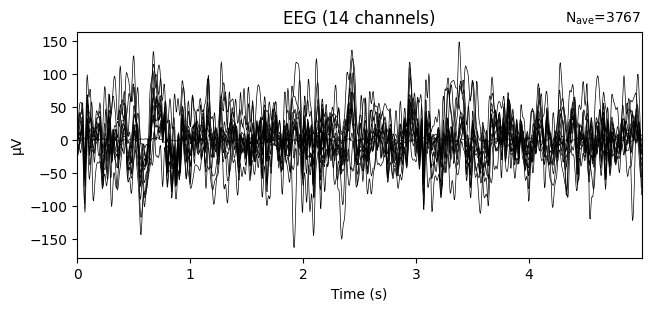

In [115]:
average_train.plot()

# MainPipeLineHere

## Map data path to csv file for each subjects

In [170]:
import mne
import numpy as np
from glob import glob
import os
from tqdm import tqdm
import pandas as pd
from IPython.display import clear_output

In [112]:
root = 'EEG Data/*/fif/.*.fif'
subjects = glob(root)
subjects, len(subjects)

(['EEG Data\\chongta\\fif\\.0.fif',
  'EEG Data\\chongta\\fif\\.1.fif',
  'EEG Data\\chongta\\fif\\.2.fif',
  'EEG Data\\chongta\\fif\\.3.fif',
  'EEG Data\\chongta\\fif\\.4.fif',
  'EEG Data\\ken\\fif\\.0.fif',
  'EEG Data\\ken\\fif\\.1.fif',
  'EEG Data\\ken\\fif\\.2.fif',
  'EEG Data\\ken\\fif\\.3.fif',
  'EEG Data\\ken\\fif\\.4.fif',
  'EEG Data\\kiki\\fif\\.0.fif',
  'EEG Data\\kiki\\fif\\.1.fif',
  'EEG Data\\kiki\\fif\\.2.fif',
  'EEG Data\\kiki\\fif\\.3.fif',
  'EEG Data\\kiki\\fif\\.4.fif'],
 15)

In [114]:
root = 'EEG Data'
subjects = os.listdir(root)
df = {}
for x in subjects:
    if '.' in x:
        subjects.remove(x)
        continue
    print(x)
    df[x] = []
    x_path = os.path.join(root, x + '/fif')
    for file_path in os.listdir(x_path):
        if 'fif' not in file_path:
            continue
        df[x].append(os.path.join(x_path, file_path))

df = pd.DataFrame(df)
df.to_csv('map_data.csv', index=False)

chongta
Focus
ken
kiki
Mi
Moai
Natsu
Pai
Pang
Shokul


## Windowing

In [115]:
df = pd.read_csv('map_data.csv')
df

chongta                              Focus  \
0  EEG Data\chongta/fif\.0.fif  EEG Data\Focus/fif\focus0_eeg.fif   
1  EEG Data\chongta/fif\.1.fif      EEG Data\Focus/fif\focus1.fif   
2  EEG Data\chongta/fif\.2.fif      EEG Data\Focus/fif\focus2.fif   
3  EEG Data\chongta/fif\.3.fif      EEG Data\Focus/fif\focus3.fif   
4  EEG Data\chongta/fif\.4.fif      EEG Data\Focus/fif\focus4.fif   

                       ken                      kiki                       Mi  \
0  EEG Data\ken/fif\.0.fif  EEG Data\kiki/fif\.0.fif  EEG Data\Mi/fif\mi0.fif   
1  EEG Data\ken/fif\.1.fif  EEG Data\kiki/fif\.1.fif  EEG Data\Mi/fif\mi1.fif   
2  EEG Data\ken/fif\.2.fif  EEG Data\kiki/fif\.2.fif  EEG Data\Mi/fif\mi2.fif   
3  EEG Data\ken/fif\.3.fif  EEG Data\kiki/fif\.3.fif  EEG Data\Mi/fif\mi3.fif   
4  EEG Data\ken/fif\.4.fif  EEG Data\kiki/fif\.4.fif  EEG Data\Mi/fif\mi4.fif   

                          Moai                          Natsu  \
0  EEG Data\Moai/fif\Moai0.fif  EEG Data\Natsu/fif\Natsu0.fif   
1  EEG Data\Moai/fif\Moai1.fif  EEG Data\Natsu/fif\Natsu1.fif   
2  EEG Data\Moai/fif\Moai2.fif  EEG Data\Natsu/fif\Natsu2.fif   
3  EEG Data\Moai/fif\Moai3.fif  EEG Data\Natsu/fif\Natsu3.fif   
4  EEG Data\Moai/fif\Moai4.fif  EEG Data\Natsu/fif\Natsu4.fif   

                         Pai                         Pang  \
0  EEG Data\Pai/fif\pai0.fif   EEG Data\Pang/fif\pang.fif   
1  EEG Data\Pai/fif\pai1.fif  EEG Data\Pang/fif\pang1.fif   
2  EEG Data\Pai/fif\pai2.fif  EEG Data\Pang/fif\pang2.fif   
3  EEG Data\Pai/fif\pai3.fif  EEG Data\Pang/fif\pang3.fif   
4  EEG Data\Pai/fif\pai4.fif  EEG Data\Pang/fif\pang4.fif   

                            Shokul  
0  EEG Data\Shokul/fif\shokul0.fif  
1  EEG Data\Shokul/fif\shokul1.fif  
2  EEG Data\Shokul/fif\shokul2.fif  
3  EEG Data\Shokul/fif\shokul3.fif  
4  EEG Data\Shokul/fif\shokul4.fif

Read and map value

In [281]:
raws = {}
for name in list(df.columns):
    raws[name] = []
    for value in df[name].values:
        raws[name].append(mne.io.Raw(value, verbose=0, preload=True))
clear_output()

slide & filter

In [117]:
def slide_window(array, window_size, stride, sfreq):
    window_size = int(window_size*sfreq)
    stride = int(stride*sfreq)
    c, t = array.shape
    slided_data = []
    for i in range(0, t-window_size, stride):
        slided_data.append(array[:, i:i+window_size])
    return np.array(slided_data)

In [292]:
min_n_times = np.Infinity
for name in subjects:
    n_times = raws[name][0].n_times
    if n_times < min_n_times:
        min_n_times = n_times
print('Min n_times:', min_n_times)

Min n_times: 1909


In [294]:
ch_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF42']
sfreq = 256
print('sfreq:', sfreq)

sfreq: 256


In [297]:
# some files are shorter than others so I -0.1 for those files
# overlap 0.2 second
window_size = round((min_n_times/sfreq) / 3, 3)
stride = window_size

# window_size = 2
# stride = 2
window_size, stride

(2.486, 2.486)

In [298]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

for name in tqdm(list(raws.keys())):
    for i in range(len(raws[name])):

        # select 14 channels from 15 channels (remove trigger channel which I don't know what is it)
        data = raws[name][i].get_data()[:-1, :]

        data = slide_window(data, window_size, stride, sfreq)

        epoch = mne.EpochsArray(data, info=info, verbose=0)
        raws[name][i] = {}
        # raws[name][i]['ALL'] = epoch
        raws[name][i]['Delta'] = epoch.copy().filter(0.5, 4)
        raws[name][i]['Theta'] = epoch.copy().filter(4, 8)
        raws[name][i]['Alpha'] = epoch.copy().filter(8, 13)
        raws[name][i]['Beta'] = epoch.copy().filter(13, 30)
        clear_output(wait=True)
        # try:
        # except:
        #     print('data is too short!')

100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


In [299]:
for name in subjects:
    for i in range(5):
        n_events = raws[name][i]['Delta'].events.shape[0]
        if n_events != 3:
            print(name, i, n_events)

chongta 4 2
Natsu 3 4


raws.pkl include ALL, window_size=3, stride=2

raws2.pkl exclude ALL, window_size=2, stride=2

raws3.pkl exclude ALL, window_size=2.6999999999999997, stride=2.4999999999999996

In [296]:
import pickle

# Save the dictionary to a pickle file
with open('raws4.pkl', 'wb') as pickle_file:
    pickle.dump(raws, pickle_file)

## Analysis

In [1]:
import pickle

# Load the dictionary from the pickle file
with open('raws4.pkl', 'rb') as pickle_file:
    raws = pickle.load(pickle_file)

# raws[name][file_order][band][epoch]
raws

{'Focus': [{'Delta': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>,
   'Theta': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>,
   'Alpha': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>,
   'Beta': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>},
  {'Delta': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>,
   'Theta': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>,
   'Alpha': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>,
   'Beta': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '1': 4>},
  {'Delta': <EpochsArray |  4 events (all good), 0 – 1.996 s, baseline off, ~235 kB, data loaded,
    '

In [2]:
subjects = list(raws.keys())
subjects

['Focus', 'Mi', 'Moai', 'Natsu', 'Pai', 'Pang', 'Shokul']

In [3]:
bands = list(raws['Focus'][0].keys())
bands

['Delta', 'Theta', 'Alpha', 'Beta']

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# raws[name][file_order][band][epoch] ->  channels x time
# raws_result[name][acitivity][file_order][epoch] -> average of gfp
# difference aroma_idx is file order
raws_result = {}
for name in tqdm(subjects):
    raws_result[name] = {'deep_sleep':{}, 'drowsiness':{}, 'relaxness':{}, 'concentration':{}}

    # aroma_idx from 5 files
    for aroma_idx in range(5):
        raws_result[name]['deep_sleep'][aroma_idx] = []
        raws_result[name]['drowsiness'][aroma_idx] = []
        raws_result[name]['relaxness'][aroma_idx] = []
        raws_result[name]['concentration'][aroma_idx] = []

        # from segmented 3 epochs
        for epoch in range(4):

            # Alpha and Beta is relax and active thinking
            # epoch is C x T
            delta = raws[name][aroma_idx]['Delta'][epoch]
            theta = raws[name][aroma_idx]['Theta'][epoch]
            alpha = raws[name][aroma_idx]['Alpha'][epoch]
            beta = raws[name][aroma_idx]['Beta'][epoch]

            delta_mean = np.mean(delta.get_data(), axis=1)
            theta_mean = np.mean(theta.get_data(), axis=1)
            alpha_mean = np.mean(alpha.get_data(), axis=1)
            beta_mean = np.mean(beta.get_data(), axis=1)

            gfp_delta = np.sqrt(np.mean((delta.get_data()-delta_mean)**2, axis=1))
            gfp_theta = np.sqrt(np.mean((theta.get_data()-theta_mean)**2, axis=1))
            gfp_alpha = np.sqrt(np.mean((alpha.get_data()-alpha_mean)**2, axis=1))
            gfp_beta = np.sqrt(np.mean((beta.get_data()-beta_mean)**2, axis=1))

            raws_result[name]['deep_sleep'][aroma_idx].append(np.mean(gfp_delta))
            raws_result[name]['drowsiness'][aroma_idx].append(np.mean(gfp_theta))
            raws_result[name]['relaxness'][aroma_idx].append(np.mean(gfp_alpha))
            raws_result[name]['concentration'][aroma_idx].append(np.mean(gfp_beta))
raws_result


  0%|          | 0/7 [00:00<?, ?it/s]C:\Users\thapa\AppData\Local\Temp\ipykernel_22296\2379796748.py:29: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  delta_mean = np.mean(delta.get_data(), axis=1)
C:\Users\thapa\AppData\Local\Temp\ipykernel_22296\2379796748.py:30: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  theta_mean = np.mean(theta.get_data(), axis=1)
C:\Users\thapa\AppData\Local\Temp\ipykernel_22296\2379796748.py:31: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  alpha_mean = np.mean(alpha.get_data(), axis=1)
C:\Users\thapa\AppData\Local\Temp\ipykernel_22296\2379796748.py:32: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warn

{'Focus': {'deep_sleep': {0: [0.0004351217739774961,
    0.00017126956309017615,
    0.0004317438251220351,
    0.0004757333070237835],
   1: [0.0003713183659974798,
    0.0004612923664757874,
    0.0005160342306162605,
    0.00042945969886582603],
   2: [0.00022634085935283393,
    0.0003891984162477376,
    0.0002094948852862562,
    0.00022772542486389463],
   3: [0.0003036920963960806,
    0.0003373386682677485,
    0.00021234081467283455,
    0.00048123045435772313],
   4: [0.00018807052308429661,
    0.0001707307050996165,
    0.00020266963962017084,
    0.0003677719974895268]},
  'drowsiness': {0: [0.00012844151557436738,
    0.00010883908463068985,
    0.00013346568659707654,
    0.00017405231240554727],
   1: [0.00010814884060953407,
    0.00010820471319802444,
    0.00012403562994679605,
    0.00014437837414082983],
   2: [0.00015571930211215817,
    0.00018372709951910513,
    0.00016882915078353586,
    0.0001373071489322883],
   3: [0.00013710111049263518,
    0.0001875177

In [28]:
window_size = 2
stride = 2

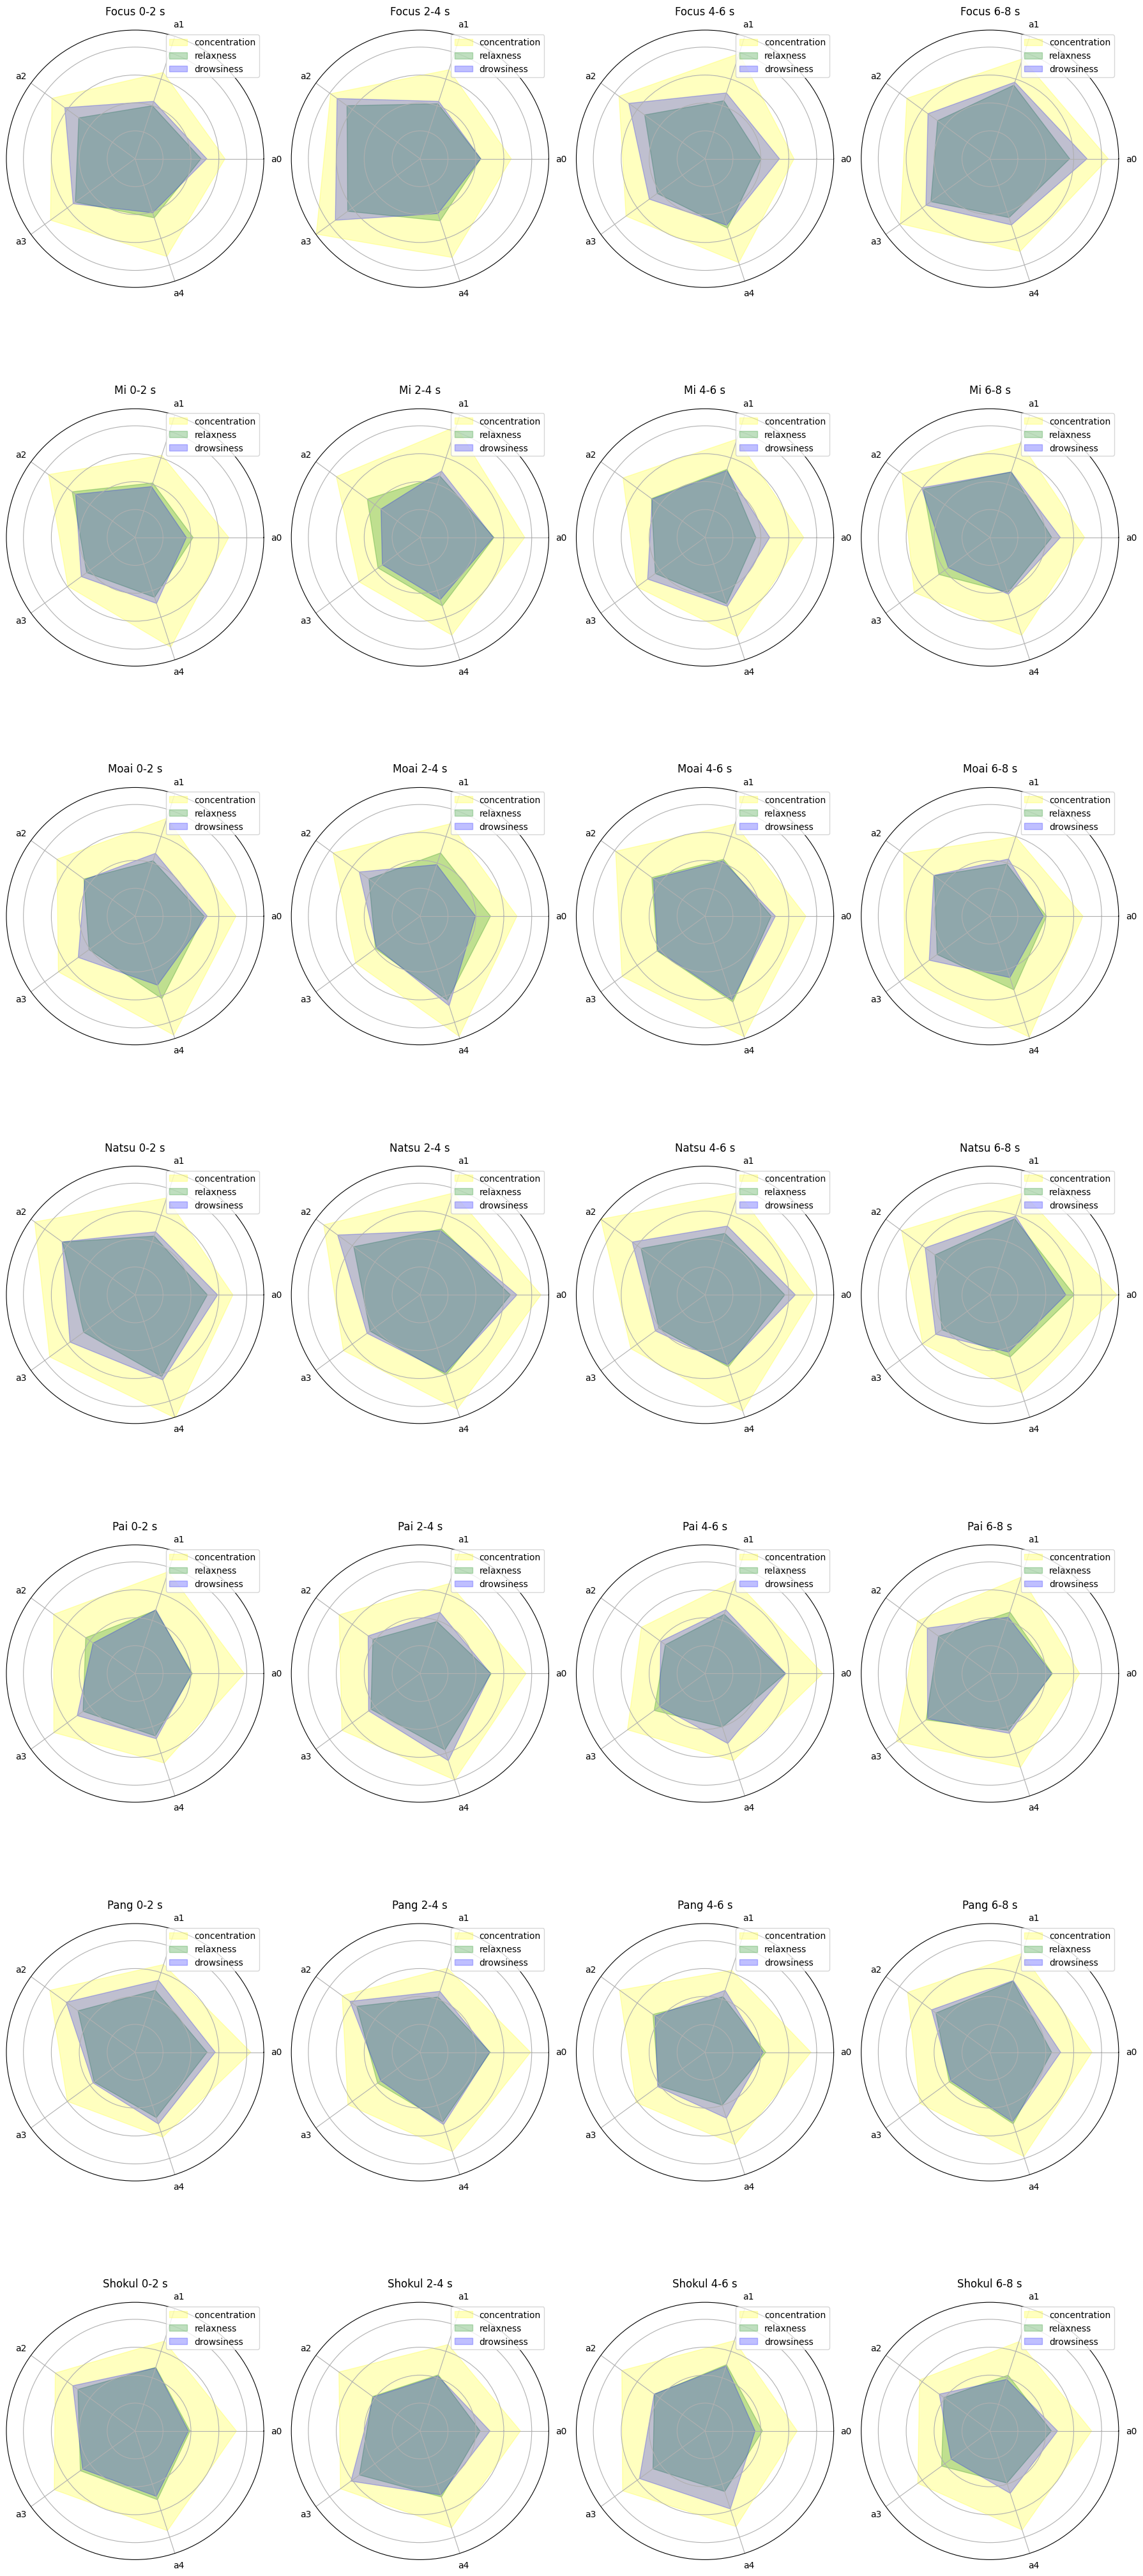

In [79]:
import matplotlib.pyplot as plt
import numpy as np

max_value = 0
epochs = 4
for name in subjects:
    for i in range(epochs):
        max_value = np.max([max_value, np.max(raws_result[name]['drowsiness'][i]), np.max(raws_result[name]['relaxness'][i]), np.max(raws_result[name]['concentration'][i])])

# Categories and their corresponding values
figs, axs = plt.subplots(len(subjects), epochs, figsize=(18, 6 * len(subjects)), subplot_kw=dict(polar=True))
categories = ['a0', 'a1', 'a2', 'a3', 'a4']
for idx, name in enumerate(subjects):
    for i in range(epochs):
        # deep_sleep_values = [raws_result[name]['deep_sleep'][j][i] for j in range(5)]
        light_sleep_values = [raws_result[name]['drowsiness'][j][i] for j in range(5)]
        relax_values = [raws_result[name]['relaxness'][j][i] for j in range(5)]
        conc_values = [raws_result[name]['concentration'][j][i] for j in range(5)]

        # Number of variables we're plotting.
        num_vars = len(categories)

        # Compute angle for each category.
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop"
        # deep_sleep_values += deep_sleep_values[:1]
        light_sleep_values += light_sleep_values[:1]
        relax_values += relax_values[:1]
        conc_values += conc_values[:1]
        angles += angles[:1]

        # Draw the radar chart.
        # axs[idx, i].fill(angles, deep_sleep_values, color='blue', alpha=0.25)
        axs[idx, i].fill(angles, conc_values, color='yellow', alpha=0.25)
        axs[idx, i].fill(angles, relax_values, color='green', alpha=0.25)
        axs[idx, i].fill(angles, light_sleep_values, color='blue', alpha=0.25)
        # axs[idx, i].plot(angles, relax_values, color='blue', linewidth=2)

        # axs[idx, i].plot(angles, conc_values, color='yellow', linewidth=2)

        axs[idx, i].set_title(f'{name} {round(i*stride, 1)}-{round(i*stride+window_size, 1)} s')

        # Set the category labels.
        axs[idx, i].set_yticklabels([])
        axs[idx, i].set_xticks(angles[:-1])
        axs[idx, i].set_xticklabels(categories)

        axs[idx, i].set

        # Set the same scale for all plots
        axs[idx, i].set_ylim(0, max_value)

        axs[idx, i].legend(['concentration', 'relaxness', 'drowsiness'], loc='upper right')

plt.tight_layout()
plt.show()


In [80]:
# raws_result[name][acitivity][file_order][epoch] -> average of gfp
task_time = 3 # first three epochs
compare_result = {}
avg_compare_result = {}
min = 1000
max = -1000
for name, act_dict in raws_result.items():
    compare_result[name] = {}

    for act, aroma_idx_dict in act_dict.items():
        compare_result[name][act] = {}

        for aroma_idx, epochs in aroma_idx_dict.items():
            compare_result[name][act][aroma_idx] = []

            first_three_percent = 0
            percent = []
            for idx, epoch in enumerate(epochs):
                ref = aroma_idx_dict[0][idx]

                if idx < task_time:
                    first_three_percent += ((epoch / ref)) / task_time
                    continue
                percent.append((epoch / ref))
                
            compare_result[name][act][aroma_idx].append(first_three_percent)
            compare_result[name][act][aroma_idx].extend(percent)
            
            if first_three_percent > max:
                max = first_three_percent
            elif first_three_percent < min:
                min = first_three_percent
            for value in percent:
                if value > max:
                    max = value
                elif value < min:
                    min = value

compare_result

{'Focus': {'deep_sleep': {0: [1.0, 1.0],
   1: [1.58065645633786, 0.902732040252872],
   2: [1.092613228565334, 0.47868295429756375],
   3: [1.0531348368157758, 1.0115551029385144],
   4: [0.6328332753703589, 0.7730633782829518]},
  'drowsiness': {0: [1.0, 1.0],
   1: [0.921841542858693, 0.8295113816380891],
   2: [1.3884666348461507, 0.7888843706503502],
   3: [1.2380079429226698, 0.8146641430572034],
   4: [0.8935926187997407, 0.7169356905717917]},
  'relaxness': {0: [1.0, 1.0],
   1: [0.9617316205409234, 0.9704082422604401],
   2: [1.290253147434487, 0.8114157642167539],
   3: [1.2142612600997296, 0.9152377483853638],
   4: [1.106355906576477, 0.7760003744652987]},
  'concentration': {0: [1.0, 1.0],
   1: [1.0925039523415818, 0.889144845563981],
   2: [1.1831724361771554, 0.8690441805771949],
   3: [1.2216585390413974, 0.9366510505947502],
   4: [1.1695887116250065, 0.8240543507299197]}},
 'Mi': {'deep_sleep': {0: [1.0, 1.0],
   1: [1.2519720453896888, 0.47362791913443686],
   2: [1

In [88]:
import pandas as pd
subjects = compare_result.keys()
act = compare_result['Focus'].keys()

data_dict = {'Name': [], 'Aroma_ID': [], 'Relax (first 6 sec) %': [], 'Relax (last 3 sec) %': [], 'Concentrate (first 6 sec) %': [], 'Concentrate (last 3 sec) %': []}
for name in subjects:
    print(f'{name} --------------------------')
    for i in range(5):
        print(f'-a{i}-')
        data_dict['Name'].append(name)
        data_dict['Aroma_ID'].append(i)
        for key in act:
            if key not in ['relaxness', 'concentration']:
                continue
            values = compare_result[name][key][i]

            print(key)
            print(f'first 6 sec:\t {values[0]*100:7.2f}%', end=' | ')
            print(f'last 3 sec:\t {values[1]*100:7.2f}%')

            if key == 'relaxness':
                data_dict['Relax (first 6 sec) %'].append(round(values[0] * 100, 2))
                data_dict['Relax (last 3 sec) %'].append(round(values[1] * 100, 2))
            elif key == 'concentration':
                data_dict['Concentrate (first 6 sec) %'].append(round(values[0] * 100, 2))
                data_dict['Concentrate (last 3 sec) %'].append(round(values[1] * 100, 2))

df = pd.DataFrame.from_dict(data_dict)
df.to_csv('person_result.csv', index=False)
df

Focus --------------------------
-a0-
relaxness
first 6 sec:	  100.00% | last 3 sec:	  100.00%
concentration
first 6 sec:	  100.00% | last 3 sec:	  100.00%
-a1-
relaxness
first 6 sec:	   96.17% | last 3 sec:	   97.04%
concentration
first 6 sec:	  109.25% | last 3 sec:	   88.91%
-a2-
relaxness
first 6 sec:	  129.03% | last 3 sec:	   81.14%
concentration
first 6 sec:	  118.32% | last 3 sec:	   86.90%
-a3-
relaxness
first 6 sec:	  121.43% | last 3 sec:	   91.52%
concentration
first 6 sec:	  122.17% | last 3 sec:	   93.67%
-a4-
relaxness
first 6 sec:	  110.64% | last 3 sec:	   77.60%
concentration
first 6 sec:	  116.96% | last 3 sec:	   82.41%
Mi --------------------------
-a0-
relaxness
first 6 sec:	  100.00% | last 3 sec:	  100.00%
concentration
first 6 sec:	  100.00% | last 3 sec:	  100.00%
-a1-
relaxness
first 6 sec:	  109.02% | last 3 sec:	  111.56%
concentration
first 6 sec:	  102.75% | last 3 sec:	  104.83%
-a2-
relaxness
first 6 sec:	  117.40% | last 3 sec:	  133.18%
concentration


Name  Aroma_ID  Relax (first 6 sec) %  Relax (last 3 sec) %  \
0    Focus         0                 100.00                100.00   
1    Focus         1                  96.17                 97.04   
2    Focus         2                 129.03                 81.14   
3    Focus         3                 121.43                 91.52   
4    Focus         4                 110.64                 77.60   
5       Mi         0                 100.00                100.00   
6       Mi         1                 109.02                111.56   
7       Mi         2                 117.40                133.18   
8       Mi         3                  97.95                102.10   
9       Mi         4                 114.32                 93.57   
10    Moai         0                 100.00                100.00   
11    Moai         1                  89.68                 96.74   
12    Moai         2                  93.53                121.66   
13    Moai         3                  83.41                115.32   
14    Moai         4                 129.24                137.13   
15   Natsu         0                 100.00                100.00   
16   Natsu         1                  81.06                 94.93   
17   Natsu         2                 104.62                 80.60   
18   Natsu         3                  75.86                 70.44   
19   Natsu         4                 102.31                 77.60   
20     Pai         0                 100.00                100.00   
21     Pai         1                  90.24                103.56   
22     Pai         2                  83.19                101.57   
23     Pai         3                  91.90                126.27   
24     Pai         4                  99.16                 95.56   
25    Pang         0                 100.00                100.00   
26    Pang         1                  89.78                121.14   
27    Pang         2                 105.07                108.31   
28    Pang         3                  79.74                 81.60   
29    Pang         4                  97.08                122.13   
30  Shokul         0                 100.00                100.00   
31  Shokul         1                 113.79                 95.42   
32  Shokul         2                 111.75                 92.58   
33  Shokul         3                 119.95                 97.25   
34  Shokul         4                 119.37                 89.12   

    Concentrate (first 6 sec) %  Concentrate (last 3 sec) %  
0                        100.00                      100.00  
1                        109.25                       88.91  
2                        118.32                       86.90  
3                        122.17                       93.67  
4                        116.96                       82.41  
5                        100.00                      100.00  
6                        102.75                      104.83  
7                        105.24                      114.87  
8                         81.99                       99.01  
9                        109.01                      108.66  
10                       100.00                      100.00  
11                        99.38                       89.76  
12                       105.44                      114.71  
13                        92.61                      113.38  
14                       126.74                      136.68  
15                       100.00                      100.00  
16                        97.08                       84.22  
17                       114.45                       86.03  
18                        90.10                       65.52  
19                       114.58                       81.19  
20                       100.00                      100.00  
21                        90.20                      113.23  
22                        84.50                       99.81  
23                        88.15  

In [81]:
avg_compare_result = {}
min = -1000
max = 1000
n_subjects = len(subjects)
for act in compare_result['Focus'].keys():
    avg_compare_result[act] = {}
    for aroma_idx in compare_result['Focus'][act].keys():
            avg_compare_result[act][aroma_idx] = []
            for epoch in compare_result['Focus'][act][aroma_idx]:
                avg_compare_result[act][aroma_idx].append(0)

for name in subjects:
    for act in compare_result[name].keys():
        for aroma_idx in compare_result[name][act].keys():
            for epoch in range(2):
                avg_compare_result[act][aroma_idx][int(epoch)] += compare_result[name][act][aroma_idx][int(epoch)]

for act in compare_result[name].keys():
    for aroma_idx in compare_result[name][act].keys():
        for epoch in range(2):
            avg_compare_result[act][aroma_idx][int(epoch)] /= n_subjects

avg_compare_result

{'deep_sleep': {0: [1.0, 1.0],
  1: [1.3144472110139376, 1.105997396443269],
  2: [1.1635838178871136, 1.161351226202085],
  3: [1.136615530268714, 1.3598180506075381],
  4: [1.158752702719602, 0.8884338104374038]},
 'drowsiness': {0: [1.0, 1.0],
  1: [0.9631203711756555, 0.979120322292054],
  2: [1.091923420880658, 1.0778057963305636],
  3: [1.0057787883739187, 0.9247852779811919],
  4: [1.1090763448681182, 0.94102708441912]},
 'relaxness': {0: [1.0, 1.0],
  1: [0.956769880462316, 1.0291416611991697],
  2: [1.0636880704650418, 1.0271877514575058],
  3: [0.9574966178998251, 0.9778638608454437],
  4: [1.103025321370479, 0.9895871455817421]},
 'concentration': {0: [1.0, 1.0],
  1: [0.9637957047057364, 0.9645933109255977],
  2: [1.0336002683163532, 0.9824383480897313],
  3: [0.9359977052746201, 0.9615586861824721],
  4: [1.0708675324991137, 1.0409336840714747]}}

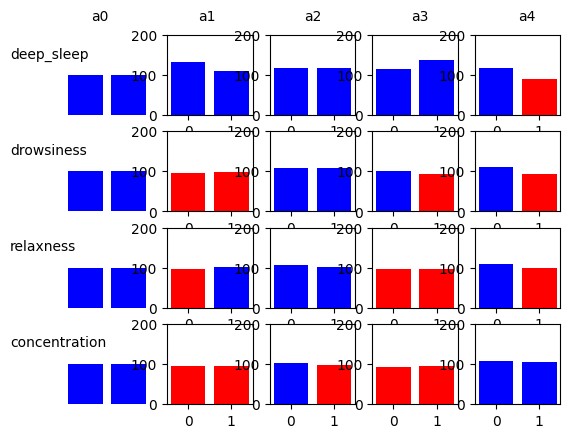

In [82]:
max = 200
min = 0
acts = list(avg_compare_result.keys())
n_acts = len(acts)
fig, axs = plt.subplots(n_acts, 5) # acts x aromas in one act

# plot bar
for i, act in enumerate(acts):
    for j in range(5):
        # name = acts[i // n_acts]
        values = avg_compare_result[act][j]
        color = ['blue' if value * 100 >= 100 else 'red' for value in values]
        axs[i, j].bar(range(2), [value * 100 for value in values], color=color)
        axs[i, j].set_ylim(min, max)
        if j%5 == 0:
            axs[i, j].axis('off')

# show name
for i in range(n_acts):
    fig.text(0.04, 1-(i/(n_acts+1) + 0.16), acts[i], va='center')

# show aroma
for i in range(5):
    fig.text(i/6 + 1/6, 1 - 0.09, f'a{i}')
# fig.text(0.45, 1 - 0.04, 'relaxness')
plt.show()

In [83]:
act = avg_compare_result.keys()
avg_compare_result_afirst = {}
for i in range(5):
    avg_compare_result_afirst[i] = {}
    print(f'a{i} --------------------------')
    for key in act:
        if key not in ['relaxness', 'concentration']:
            continue
        values = avg_compare_result[key][i]

        avg_compare_result_afirst[i][key] = values
        print(key)
        print(f'first 6 sec:\t {values[0]*100:7.2f}%')
        print(f'last 3 sec:\t {values[1]*100:7.2f}%')
avg_compare_result_afirst

a0 --------------------------
relaxness
first 6 sec:	  100.00%
last 3 sec:	  100.00%
concentration
first 6 sec:	  100.00%
last 3 sec:	  100.00%
a1 --------------------------
relaxness
first 6 sec:	   95.68%
last 3 sec:	  102.91%
concentration
first 6 sec:	   96.38%
last 3 sec:	   96.46%
a2 --------------------------
relaxness
first 6 sec:	  106.37%
last 3 sec:	  102.72%
concentration
first 6 sec:	  103.36%
last 3 sec:	   98.24%
a3 --------------------------
relaxness
first 6 sec:	   95.75%
last 3 sec:	   97.79%
concentration
first 6 sec:	   93.60%
last 3 sec:	   96.16%
a4 --------------------------
relaxness
first 6 sec:	  110.30%
last 3 sec:	   98.96%
concentration
first 6 sec:	  107.09%
last 3 sec:	  104.09%


{0: {'relaxness': [1.0, 1.0], 'concentration': [1.0, 1.0]},
 1: {'relaxness': [0.956769880462316, 1.0291416611991697],
  'concentration': [0.9637957047057364, 0.9645933109255977]},
 2: {'relaxness': [1.0636880704650418, 1.0271877514575058],
  'concentration': [1.0336002683163532, 0.9824383480897313]},
 3: {'relaxness': [0.9574966178998251, 0.9778638608454437],
  'concentration': [0.9359977052746201, 0.9615586861824721]},
 4: {'relaxness': [1.103025321370479, 0.9895871455817421],
  'concentration': [1.0708675324991137, 1.0409336840714747]}}

In [30]:
import json
with open("avg_compare_result_afirst.json", "w") as f:
    f.write(json.dumps(avg_compare_result_afirst, indent=4))